In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *

## matrix inverse visualization

In [ ]:
m = 3
A = np.random.randn(m,m)

Ainv = np.linalg.inv(A)

i = A @ Ainv
print(i)

[[ 1.00000000e+00 -9.78084769e-18  1.70003546e-16]
 [-7.91067188e-17  1.00000000e+00  4.34865804e-17]
 [-3.81448483e-17 -9.70320940e-18  1.00000000e+00]]


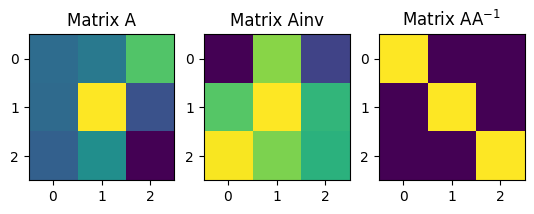

In [ ]:
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix Ainv')

plt.subplot(133)
plt.imshow(i)
plt.title('Matrix AA$^{-1}$')
plt.show()

### code challenge: MCA Algo

In [ ]:
m = 4
A = np.random.randint(1,11,(m,m))

# Minors matrix
minors = np.zeros((m,m))
H= np.zeros((m,m))

for i in range(m):
  for j in range(m):

    #select rows and columns
    rows = [True]*m
    rows[i] = False

    cols = [True]*m
    cols[j] = False

    minors[i,j] = np.linalg.det(A[rows,:][:,cols])

    H[i,j] = (-1)**(i+j)

 
C = H *minors 


Ainv = C.T/np.linalg.det(A)
print(A@Ainv)



Ainv2 = np.linalg.inv(A)
print(A@Ainv2)

4
[[ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]
 [ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]]
[[ 1.00000000e+00 -2.22044605e-16 -4.71844785e-16  1.94289029e-16]
 [ 2.77555756e-16  1.00000000e+00 -9.15933995e-16  3.60822483e-16]
 [ 5.55111512e-17 -3.88578059e-16  1.00000000e+00  2.91433544e-16]
 [-1.77635684e-15 -4.44089210e-16 -6.66133815e-16  1.00000000e+00]]
[[ 1.00000000e+00  2.77555756e-16 -1.38777878e-16  1.38777878e-17]
 [ 2.77555756e-16  1.00000000e+00  8.32667268e-17  1.38777878e-17]
 [-1.66533454e-16 -5.55111512e-17  1.00000000e+00 -1.38777878e-17]
 [-4.44089210e-16  4.44089210e-16 -2.22044605e-16  1.00000000e+00]]


## Row reduction method

In [ ]:
#matrix size
m = 4

# random integers matrix
A = Matrix(np.round(10*np.random.randn(m,m)),dtype='float')

# augment A and identity
Aaug = Matrix(np.concatenate((A,np.eye(m,m)),axis=1))
print('size of aaug:', Aaug.shape)

#rref
Asol = Aaug.rref()
Asol = Asol[0]

print(Asol.shape)
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()


size of aaug: (4, 8)
(4, 8)


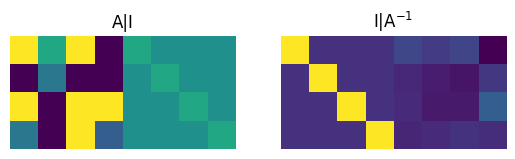

In [ ]:
plt.subplot(121)
plt.imshow(matrix2numpy(Aaug,dtype='float'),vmin=-5,vmax=5)
plt.title('A|I'),plt.axis('off')

plt.subplot(122)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'),plt.axis('off')

plt.show()

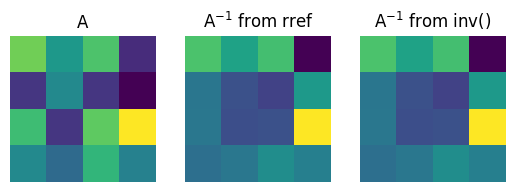

In [ ]:
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('A'),plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'),plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'),plt.axis('off')
plt.show()

### Code challenge: Inverse of a diag matrix

In [ ]:
m = 10

#diag matrix
A = np.diag(np.arange(1,m))
print(A)
Ainv = np.linalg.inv(A)
print(Ainv) # see corty phenomenon (diag ma vako elements are 1/num)
print(A@Ainv)

[[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 9]]
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.25       0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.2        0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.16666667
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.14285714 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.125      0.        ]
 [0.         0.         0.        

## One sided inverse

In [ ]:
# m>n for left inverse
# m<n for right inverse

m = 6
n = 8

#create matrices
A = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

#inspect ranks
print("Shape of AtA", AtA.shape)
print("Rank of AtA", np.linalg.matrix_rank(AtA))
print("Shape of AAt", AAt.shape)
print("Rank of AAt", np.linalg.matrix_rank(AAt))

# left inverse
Aleft = np.linalg.inv(AtA)@A.T
print(Aleft)

# right inverse
Aright = A.T@np.linalg.inv(AAt)
print(Aright)

# test
I_left = Aleft @ A
I_right = A @ Aright

print(I_left)
print(I_right)

#final test using inverse function
AtA_inv = np.linalg.inv(AtA)
I_AtA = AtA_inv @ AtA #test left inverse

AAt_inv = np.linalg.inv(AAt)
I_AAt = AAt_inv @ AAt #test right inverse

print(I_AtA)
print(I_AAt)

Shape of AtA (8, 8)
Rank of AtA 6
Shape of AAt (6, 6)
Rank of AAt 6
[[-0.16965643 -0.88319293  0.87847427 -0.4608956  -0.69012296 -1.36231862]
 [ 0.21108987 -0.2165718   0.17207897  0.05670166 -0.03890423  0.17868711]
 [-0.04501199  0.24217602 -0.13392004  0.24374206  0.24092331  0.77808695]
 [ 0.12447898 -0.12398588  0.01715706 -0.19631325  0.13377903 -0.22745205]
 [ 0.0276151  -0.0089296  -0.03204928 -0.46747614 -0.13094832 -0.03420302]
 [-0.14634987 -0.12061676  0.24015188 -0.08493175  0.20026638 -0.27769699]
 [-0.07960067  0.15708152 -0.10831051  0.02493286 -0.00837209  0.12192535]
 [-0.0284505  -0.25718886 -0.38982663  0.16713715  0.11481468  0.31019401]]
[[-0.00181244 -0.38707851  1.14828992 -0.68225112 -0.34242775 -0.65059685]
 [ 0.25119121  0.06493048  0.27094949  0.02982605 -0.00177143  0.1204159 ]
 [-0.15070749  0.04708218 -0.24066772  0.15042562  0.0179776   0.42330015]
 [ 0.04907299 -0.1252991   0.01143202 -0.41128774 -0.02150647 -0.31843436]
 [ 0.11050911 -0.0629296  -0.02

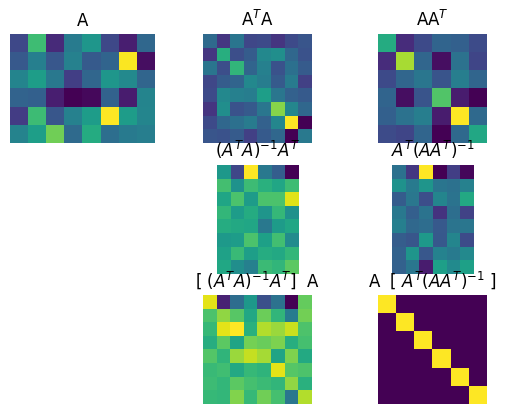

In [ ]:
## show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()

### code challenge: pseudoinverse

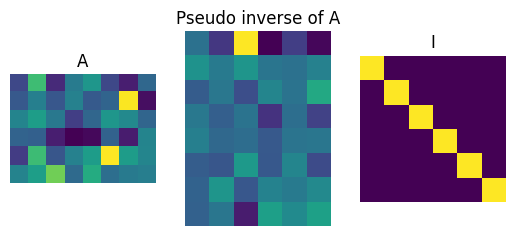

In [ ]:
pseudoinvA = np.linalg.pinv(A)

plt.subplot(1,3,1)
plt.imshow(A),plt.axis('off')
plt.title('A')

plt.subplot(1,3,2)
plt.imshow(pseudoinvA),plt.axis('off')
plt.title('Pseudo inverse of A')

plt.subplot(1,3,3)
plt.imshow(A @ pseudoinvA),plt.axis('off')
plt.title('I') 
plt.show()

# conclusion: right inverse xa vane , pseudoinverse is right inverse. and vice versa

rank = 49


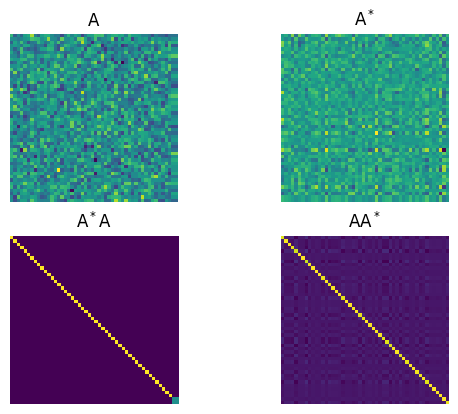

In [ ]:
## pseudo inverse in right and left of the matrix is not same!

# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))
# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()

### code challenge: Pseudo inverse of invertible matrix

In [ ]:
# pseudo inverse is same as the real inverse for an invertible matrix

m = 5
A = np.round(10*np.random.rand(m,m))
print(A)

AinvF = np.linalg.inv(A)
AinvP = np.linalg.pinv(A)

print(np.round(AinvP-AinvF,5)) #hence proved!


[[ 2.  2.  6.  9.  7.]
 [ 4.  4.  1.  4. 10.]
 [ 6.  3.  1.  8.  4.]
 [ 0.  1.  9.  4.  4.]
 [10.  7.  2.  4.  6.]]
[[-0.  0.  0.  0. -0.]
 [ 0. -0. -0. -0.  0.]
 [ 0. -0. -0. -0.  0.]
 [ 0. -0. -0. -0.  0.]
 [-0.  0.  0.  0. -0.]]
